# PROJECT : TELICOM CUSTOMER CHURN ANALYSIS USING EDA + ML

# Customer Churn
Customer churn, also known as customer attrition,is when a customer chooses to stop using products or services of a company. But with each customer who churns, there are usually early indicators or metrics that can have been uncovered with churn analysis.

For example:The Telecom Industry faces a lot of Churn(With annual churn rate of 15-25%) because
the customers can choose from a variety of service providers and actively switch from existing to another.

# Objectives in this Analysis

Objective is to find solutions and suggestions for any possible churning.

1)What is the percentage of Customers who are with the active services and Customers who Churn ?

2)Does gender play a role in Customers Churn ?

3)Does the type of service provided leads to more/less Customers Churn?

4)What's the most profitable service types?


#               PROBLEM STATEMENT:
#####  You are working for a LARGE Telicom comapny  and you want to target to thoes customers who are likely to leave your company and move to some other competitior.

# Loading libraries and Dataset

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [296]:
ch=pd.read_csv("C:\Dataset\Churn.csv")

In [297]:
ch.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning 

In [298]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [299]:
ch=ch.drop(['customerID'] ,axis=1)

In [300]:
#Converting Object column to Numerical Column
ch['TotalCharges']=pd.to_numeric(ch.TotalCharges ,errors='coerce')

In [301]:
ch.isnull().sum()

gender               0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [302]:
#Fillna with mean values 

ch=ch.fillna(ch.TotalCharges.mean())

In [303]:
ch.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#####  75% customers have tenure less than 55 months

#####  Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

# Data Visualization 

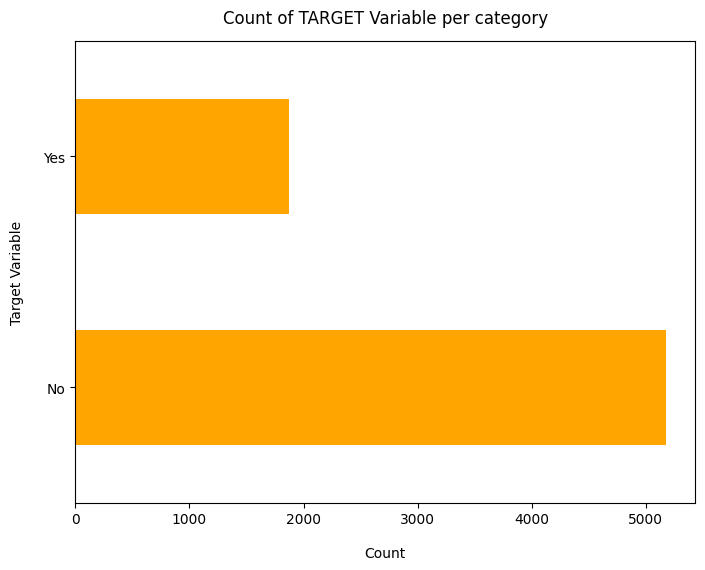

In [304]:
ch['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [305]:
100*ch['Churn'].value_counts()/len(ch['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

##### Data is highly imbalanced, ratio = 73:46

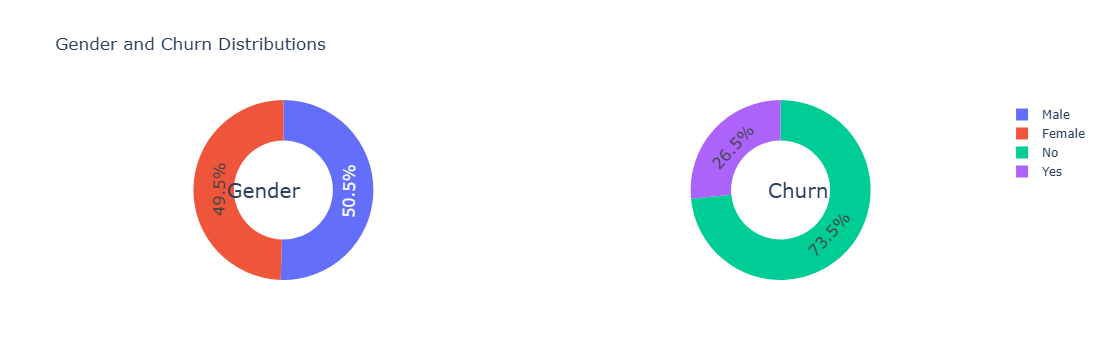

In [306]:

gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=ch['gender'].value_counts(), name="Gender"), 1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=ch['Churn'].value_counts(), name="Churn"), 1, 2)
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])

pie chart will show Male and Female are 50% but Churn rate are differnt 
Male wise 73% Customers are  Churn and Female wise 27% Churn.

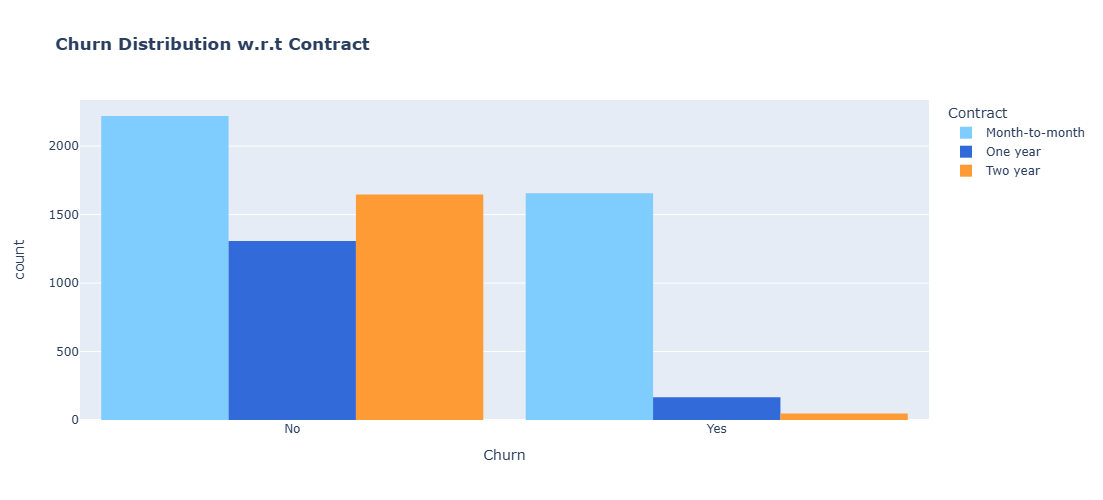

In [307]:
color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}

fig = px.histogram(ch, x="Churn", color="Contract", barmode="group", title="<b>Churn Distribution w.r.t Contract<b>", color_discrete_map = color_discrete_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show();

75% of customer who have Month-to-Month Contract have opted to move out as compared to 25% of customers who have signed 
One Year Contract and 3% of customers who have signed Two Year Contract.

<Figure size 1000x600 with 0 Axes>

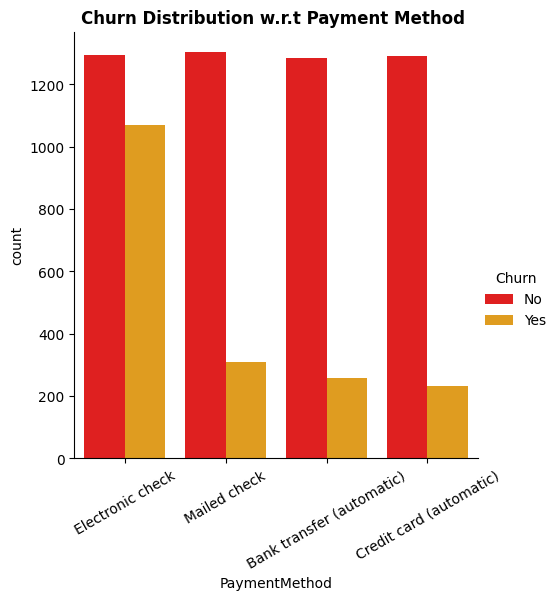

In [308]:
plt.figure(figsize=(10,6)) 
custom_palette = ["red","orange"]
sns.set_palette(custom_palette)
sns.catplot(x="PaymentMethod",hue="Churn",kind="count",data=ch );
plt.title("Churn Distribution w.r.t Payment Method " ,fontdict={"weight": "bold"} );
plt.xticks(rotation=30);



Majority of the customers  who moved out were having 
Electronic Check as Payment Method and others who opted for 
Credit-Card automatic transfer / Bank Automatic Transfer 
and Mailed Check as Payment Method were less likely to switch

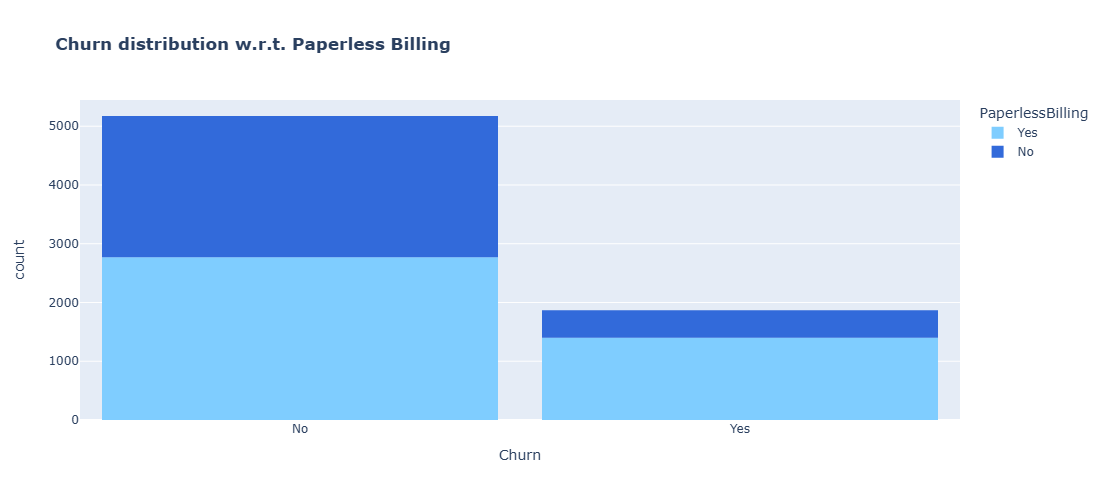

In [309]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(ch, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Paperless Billing seems like one the reasons because of which customers are most likely to churn

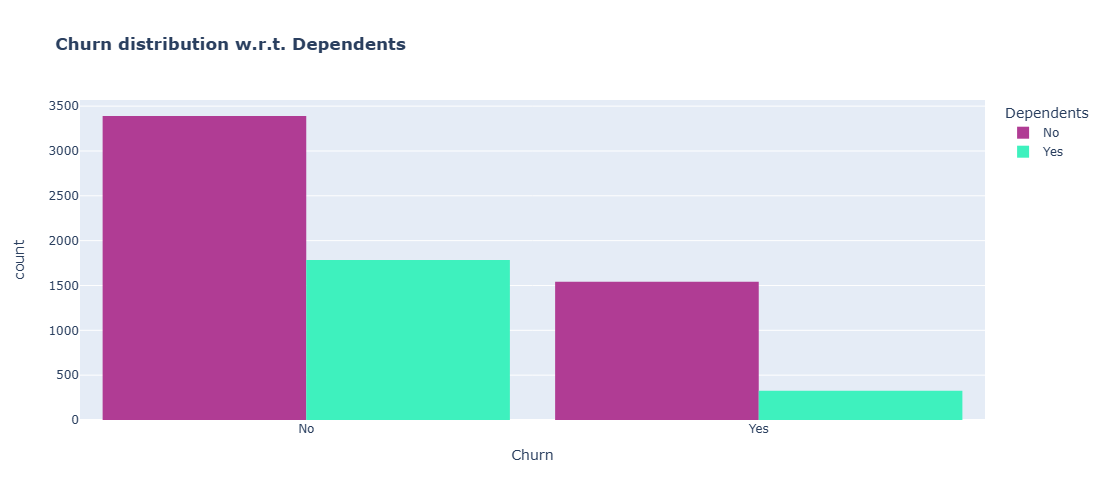

In [310]:
color_map = {"Yes": "#3ef1be", "No": "#B03C94"}
fig = px.histogram(ch, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more Likely to churn 

<Figure size 1000x600 with 0 Axes>

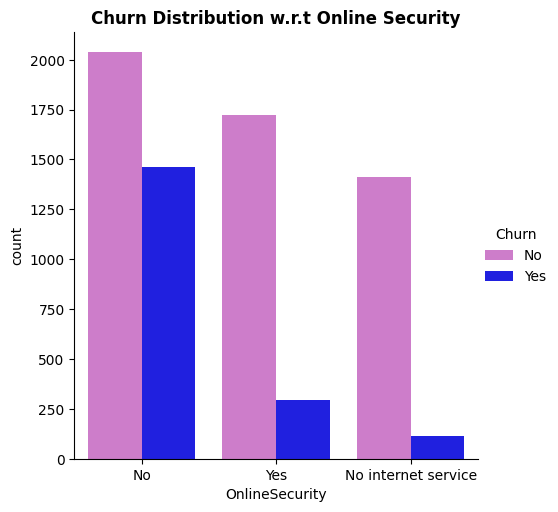

In [311]:
plt.figure(figsize=(10,6))  
custom_palette = ["orchid","blue"]
sns.set_palette(custom_palette)
sns.catplot(x="OnlineSecurity",hue="Churn",kind="count",data=ch );
plt.title("Churn Distribution w.r.t Online Security" ,fontdict={"weight": "bold"} );

The absence of Online Security ,makes most Customers churn

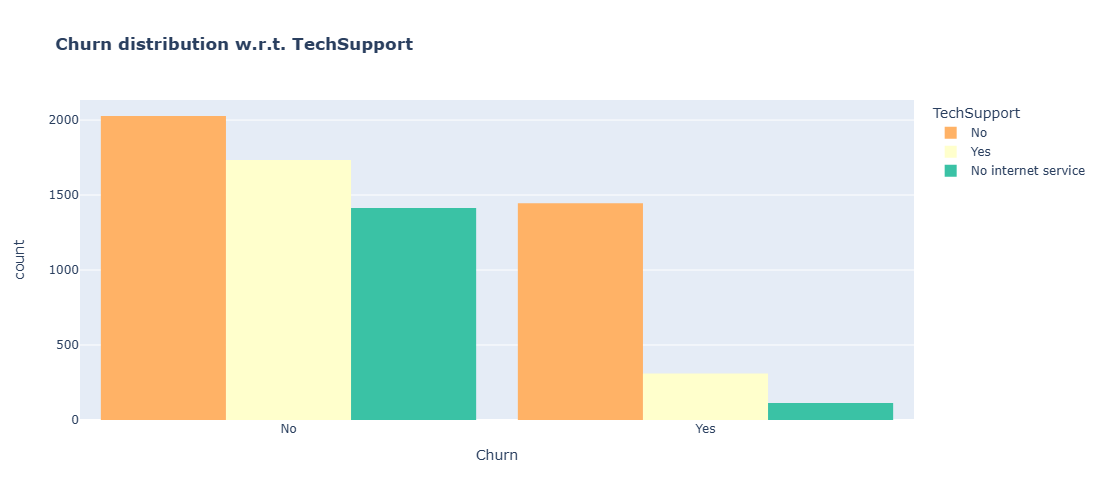

In [312]:
color_map = {"Yes": "#FFFFCC", "No": "#FFB266" , 'No internet service':'#3ac2a5'}
fig = px.histogram(ch, x="Churn", color="TechSupport", barmode="group", title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

The absence of online security,Paperless Billing system and services with no TechSupport were the similiar 
trend are of the customers who are most likely to churn.

<Figure size 1000x600 with 0 Axes>

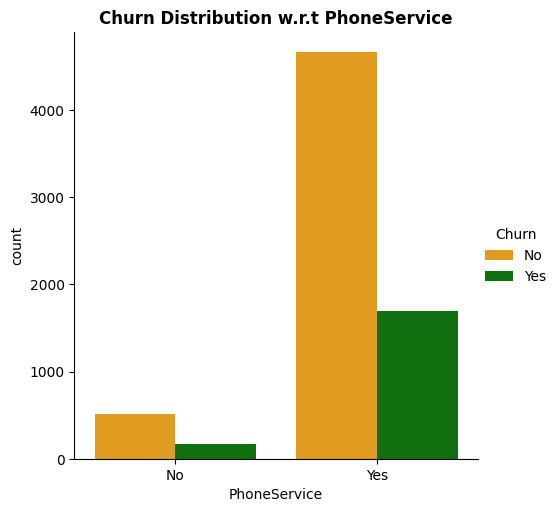

In [313]:
plt.figure(figsize=(10,6)) 
custom_palette = ["orange","green"]
sns.set_palette(custom_palette)
sns.catplot(x="PhoneService",hue="Churn",kind="count",data=ch );
plt.title("Churn Distribution w.r.t PhoneService" ,fontdict={"weight": "bold"} );

Eventhough there's a small fraction of customers 
but it's better to point out as they are more likely to churn because don't have a phone service

In [314]:
ch.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

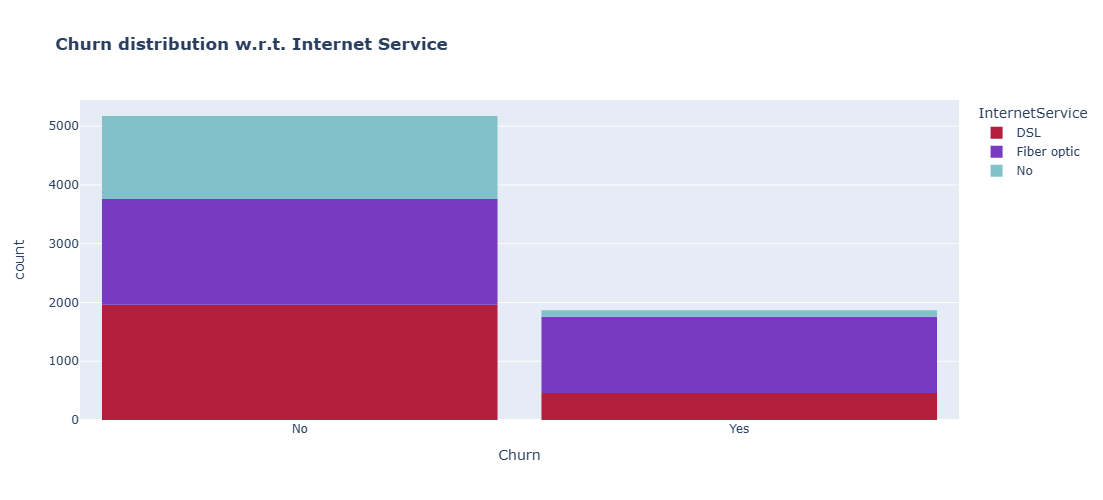

In [315]:
color_map = {"DSL": '#b31e3c', "Fiber optic": '#793ac2' ,'No':'#83c1c9'}
fig = px.histogram(ch, x="Churn", color="InternetService",  title="<b>Churn distribution w.r.t. Internet Service </b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service

In [316]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ch[ch.select_dtypes(include='object').columns]=ch[ch.select_dtypes(include='object').columns].apply(le.fit_transform)
ch.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature Selection 

In [317]:
ch_x=ch.iloc[: ,0:-1]
ch_y=ch.iloc[: ,-1]

corr_list=[]
for col in ch_x.columns:
    corr_list.append(ch_x[col].corr(ch_y))
    
feature_imp=pd.DataFrame()
feature_imp['Column']=ch_x.columns
feature_imp['corr']=corr_list
feature_imp

feature_imp =feature_imp[(feature_imp['corr'] < -.1) | (feature_imp['corr'] > .1)]
l1=list(feature_imp.Column)
l1.append('Churn')
l1
ch=ch.loc[:,l1]
ch.shape



(7043, 13)

In [318]:
feature_imp

,Column,corr
1,Partner,-0.150448
2,Dependents,-0.164221
3,tenure,-0.352229
7,OnlineSecurity,-0.289309
8,OnlineBackup,-0.195525
9,DeviceProtection,-0.178134
10,TechSupport,-0.282492
13,Contract,-0.396713
14,PaperlessBilling,0.191825
15,PaymentMethod,0.107062


Feature Selection using Correlation 

A value close to 0 then no relation between x and y 

A value close to 1 is implies Stronger positive correlation 

A value close to -1 is implies stronger negetive correlation 

using -1 to +1 range feature selection gives 17 important columns and build the 17 features .

In [319]:
x=ch.drop('Churn',axis=1)
x

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,34,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,2,2,2,0,0,0,1,3,53.85,108.15
3,0,0,45,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,2,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,24,2,0,2,2,1,1,3,84.80,1990.50
7039,1,1,72,0,2,2,0,1,1,1,103.20,7362.90
7040,1,1,11,2,0,0,0,0,1,2,29.60,346.45
7041,1,0,4,0,0,0,0,0,1,3,74.40,306.60


In [320]:
y=ch['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

### Train Test Split

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Decision Tree Model

In [362]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 80,max_depth=6, min_samples_leaf=8)

In [363]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=80)

In [364]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [365]:
model_dt.score(x_test,y_test)

0.7885024840312278

In [366]:
print(metrics.confusion_matrix(y_test, y_pred))

[[934  90]
 [208 177]]


In [367]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1024
           1       0.66      0.46      0.54       385

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



##### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

##### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
##### Hence, moving ahead to call SMOTEENN

#### Using SMOTE

In [368]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y) 

In [369]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [370]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 80,max_depth=6, min_samples_leaf=8)

In [371]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=80)

In [372]:
yr_predict = model_dt_smote.predict(xr_test)
print(metrics.confusion_matrix(yr_test, yr_predict))

[[493  54]
 [ 30 595]]


In [373]:
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9283276450511946
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       547
           1       0.92      0.95      0.93       625

    accuracy                           0.93      1172
   macro avg       0.93      0.93      0.93      1172
weighted avg       0.93      0.93      0.93      1172



##### Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.

##### Let's try with some other classifier.

### Random Forest Model 

In [374]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 70,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=70)

In [375]:
rf_pred=model_rf.predict(x_test)

In [376]:
model_rf.score(x_test,y_test)

0.794889992902768

In [377]:
print(metrics.confusion_matrix(y_test, rf_pred))

[[938  86]
 [203 182]]


In [378]:
print(classification_report(y_test, rf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1024
           1       0.68      0.47      0.56       385

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### Using Smote

In [379]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [380]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [381]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 70,max_depth=6, min_samples_leaf=8)

In [382]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=70)

In [383]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [384]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
model_score_r1 

0.9387755102040817

In [385]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[503  42]
 [ 30 601]]


In [386]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       545
           1       0.93      0.95      0.94       631

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



##### With RF Classifier, also we are able to get quite good results, Better Than Decision Tree 

#### Logistic Regression Model

In [387]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(x_train ,y_train)

LogisticRegression()

In [388]:
pred_lgr=lg_model.predict(x_test)
mat_test=confusion_matrix(y_test ,pred_lgr)
mat_test

array([[900, 124],
       [174, 211]], dtype=int64)

In [389]:
print(classification_report(y_test, pred_lgr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1024
           1       0.63      0.55      0.59       385

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [390]:
pred_proba_test=lg_model.predict_proba(x_test)
len(pred_proba_test)

1409

In [391]:
from sklearn.metrics import roc_auc_score ,roc_curve


In [392]:
roc_auc_score(y_test,pred_proba_test[: ,1])

0.8268694196428571

In [393]:
fpr,tpr,thres=roc_curve(y_test ,pred_proba_test[: ,1])

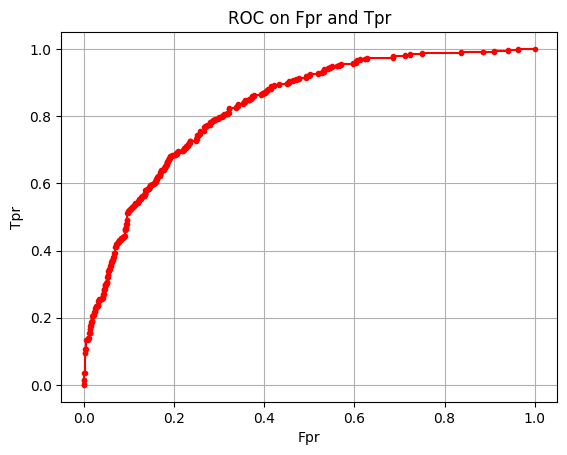

In [394]:
plt.plot(fpr ,tpr ,marker='.',color='red')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC on Fpr and Tpr")
plt.grid()

### Using Smote

In [395]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x,y)
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)
model_lg_smote=LogisticRegression()
model_lg_smote.fit(xr_train2,yr_train2)

LogisticRegression()

In [396]:
pred_lg1= model_lg_smote.predict(xr_test2)
mat_test1=confusion_matrix(yr_test2 ,pred_lg1)
mat_test1

array([[500,  47],
       [ 47, 578]], dtype=int64)

In [397]:
print(classification_report(yr_test2, pred_lg1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       547
           1       0.92      0.92      0.92       625

    accuracy                           0.92      1172
   macro avg       0.92      0.92      0.92      1172
weighted avg       0.92      0.92      0.92      1172



In [398]:
pred_proba_test1=model_lg_smote.predict_proba(xr_test2)
len(pred_proba_test1)

1172

In [399]:
roc_auc_score(yr_test2,pred_proba_test1[: ,1])

0.978562340036563

In [400]:
fpr1,tpr1,thres1=roc_curve(yr_test2 ,pred_proba_test1[: ,1])

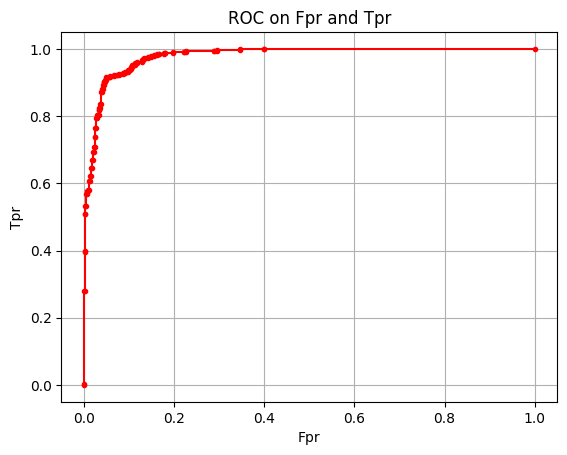

In [401]:
plt.plot(fpr1 ,tpr1 ,marker='.',color='red')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC on Fpr and Tpr")
plt.grid()

# Conclusion:

### From the Above models, we can say that the Decision Tree Model performs much better than the other models.
### Customer churn economically decreases the company's funds and affects it's profitability.

### Analysis in Operational Level would help the management to find which departments or services is causing the customer to churn out.
### Based on identifying the issue, ample of strategies can be implemented to eliminate customer churn. 
### Identifying customers who are at risk of churning and working to improve their experience and
### the quality service would help in building customer loyalty.